In [1]:
import torch
from torch import nn
from d2l import torch as d2l

def nin_block(in_channels,out_channels,kernel_size,stride,padding):
    return nn.Sequential(
        nn.Conv2d(in_channels,out_channels,kernel_size,stride,padding),nn.ReLU(),
        nn.Conv2d(out_channels,out_channels,kernel_size=1),nn.ReLU(),
        nn.Conv2d(out_channels,out_channels,kernel_size=1),nn.ReLU()
    )

net=nn.Sequential(
    nin_block(1,96,kernel_size=11,stride=4,padding=0),
    nn.MaxPool2d(3,stride=2),
    nin_block(96,256,kernel_size=5,stride=1,padding=2),
    nn.MaxPool2d(3,stride=2),
    nin_block(256,384,kernel_size=3,stride=1,padding=1),
    nn.MaxPool2d(3,stride=2),
    nn.Dropout(0.5),
    nin_block(384,10,kernel_size=3,stride=1,padding=1), # 标签类别数是10
    nn.AdaptiveAvgPool2d((1,1)),    # 将四维的输出转成二维的输出,形状为(批量大小,10)
    nn.Flatten()
)

X=torch.rand(size=(1,1,224,224))
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


In [2]:
from torchsummary import summary
summary(net,(1,224,224),batch_size=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [1, 96, 54, 54]          11,712
              ReLU-2            [1, 96, 54, 54]               0
            Conv2d-3            [1, 96, 54, 54]           9,312
              ReLU-4            [1, 96, 54, 54]               0
            Conv2d-5            [1, 96, 54, 54]           9,312
              ReLU-6            [1, 96, 54, 54]               0
         MaxPool2d-7            [1, 96, 26, 26]               0
            Conv2d-8           [1, 256, 26, 26]         614,656
              ReLU-9           [1, 256, 26, 26]               0
           Conv2d-10           [1, 256, 26, 26]          65,792
             ReLU-11           [1, 256, 26, 26]               0
           Conv2d-12           [1, 256, 26, 26]          65,792
             ReLU-13           [1, 256, 26, 26]               0
        MaxPool2d-14           [1, 256,

loss 0.556, train acc 0.788, test acc 0.784
1718.2 examples/sec on cuda:0


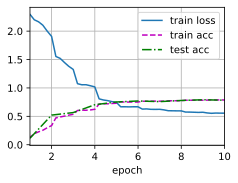

In [3]:
lr,num_epochs,batch_size=0.1,10,128
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size,resize=224)
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

Exercises

调整超参数提高精度

loss 0.251, train acc 0.908, test acc 0.904
1319.3 examples/sec on cuda:0


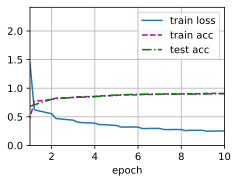

In [4]:
def init_weights(m):
    if type(m)==nn.Linear or type(m)==nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)
        
net.apply(init_weights)
lr,num_epochs,batch_size=0.1,10,32
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size,resize=224)
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

将NiN块中的两个1×1卷积层改为只用一个

loss 0.355, train acc 0.868, test acc 0.845
2217.4 examples/sec on cuda:0


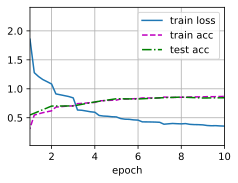

In [5]:
def nin_block_modified(in_channels,out_channels,kernel_size,stride,padding):
    return nn.Sequential(
        nn.Conv2d(in_channels,out_channels,kernel_size,stride,padding),nn.ReLU(),
        nn.Conv2d(out_channels,out_channels,kernel_size=1),nn.ReLU()
    )

net=nn.Sequential(
    nin_block_modified(1,96,kernel_size=11,stride=4,padding=0),
    nn.MaxPool2d(3,stride=2),
    nin_block_modified(96,256,kernel_size=5,stride=1,padding=2),
    nn.MaxPool2d(3,stride=2),
    nin_block_modified(256,384,kernel_size=3,stride=1,padding=1),
    nn.MaxPool2d(3,stride=2),
    nn.Dropout(0.5),
    nin_block_modified(384,10,kernel_size=3,stride=1,padding=1),
    nn.AdaptiveAvgPool2d((1,1)),
    nn.Flatten()
)

lr,num_epochs,batch_size=0.1,10,128
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size,resize=224)
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())